データの可視化  
このファイルでは教師データと評価データに関して下記を主に確認
- データ数
- 欠損数
- データの分布  

結論としては、教師・評価データに大きな差異はなさそう

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')

In [2]:
data_path = '../1.data/'
train_file_name = 'train.csv'
test_file_name  = 'test.csv'

In [3]:
train_df = pd.read_csv(f'{data_path}{train_file_name}')
test_df  = pd.read_csv(f'{data_path}{test_file_name}')

In [4]:
train_df.head()

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
0,0,nashville,1949,bmw,excellent,6 cylinders,gas,115148,clean,manual,rwd,mid-size,convertible,orange,NaN,27587
1,1,state college,2013,toyota,fair,8 cylinders,gas,172038,clean,automatic,rwd,full-size,sedan,silver,pa,4724
2,2,wichita,1998,ford,good,6 cylinders,gas,152492,clean,automatic,fwd,full-size,SUV,silver,ks,10931
3,3,albany,2014,ford,excellent,4 cylinders,gas,104118,clean,manual,fwd,mid-size,SUV,blue,ny,16553
4,4,redding,2005,ford,excellent,6 cylinders,gas,144554,clean,manual,fwd,mid-size,sedan,red,ca,5158


In [5]:
# データ数
print(f'train_len = {len(train_df)}')
print(f'test_len  = {len(test_df)}')

train_len = 27532
test_len  = 27537


In [6]:
# データ型
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27532 entries, 0 to 27531
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            27532 non-null  int64 
 1   region        27532 non-null  object
 2   year          27532 non-null  int64 
 3   manufacturer  27532 non-null  object
 4   condition     27532 non-null  object
 5   cylinders     27532 non-null  object
 6   fuel          26293 non-null  object
 7   odometer      27532 non-null  int64 
 8   title_status  27076 non-null  object
 9   transmission  27532 non-null  object
 10  drive         27532 non-null  object
 11  size          27532 non-null  object
 12  type          27076 non-null  object
 13  paint_color   27532 non-null  object
 14  state         24228 non-null  object
 15  price         27532 non-null  int64 
dtypes: int64(4), object(12)
memory usage: 3.4+ MB


In [7]:
# 欠損データの数
isna_sum_df = pd.merge(
    left  = train_df.isna().sum().rename('train').reset_index()[:-1],
    right = test_df.isna().sum().rename('test').reset_index(),
    how = 'left', on = 'index')

isna_sum_df[isna_sum_df['train']!=0]

,index,train,test
6,fuel,1239,1495
8,title_status,456,229
12,type,456,229
14,state,3304,3029


In [8]:
non_cols = ['id']
num_cols = ['year', 'odometer']
cat_cols = [col for col in train_df.columns if col not in non_cols + num_cols]

merge_df = pd.concat([train_df, test_df])
merge_df.loc[merge_df['price'].isnull(), 'train_test'] = 'test'
merge_df.loc[~merge_df['price'].isnull(), 'train_test'] = 'train'

num_df = merge_df[num_cols+['train_test']]
cat_df = merge_df[cat_cols+['train_test']]

In [9]:
# エラーデータ処理
is_error_year = train_df['year'] > 2023
train_df.loc[is_error_year, 'year'] = train_df[is_error_year]['year'] - 1000

size_replace = \
    {'fullーsize':'full-size', 'midーsize':'mid-size', 
     'fullーsize':'full-size', 'subーcompact':'sub-compact', 
     'mid−size':'mid-size', 'full−size':'full-size'}
train_df['size'] = train_df['size'].replace(size_replace)

manufactuer_replace = {
    'ｂｍｗ':'bmw', 'BMW':'bmw', 'ＢＭＷ':'bmw',
    'TOYOTA':'toyota', 'ＴＯＹＯＴＡ':'toyota', 'ｔｏｙｏｔａ':'toyota', 'toyotа':'toyota',
    'ｆｏｒｄ':'ford', 'FORD':'ford', 'ＦＯＲＤ':'ford',
    'NISSAN':'nissan', 'ＮＩＳＳＡＮ':'nissan', 'ｎｉｓｓａｎ':'nissan', 'nisѕan':'nissan', 'niѕsan':'nissan',
    'ＶＯＬＫＳＷＡＧＥＮ':'volkswagen', 'ｖｏｌｋｓｗａｇｅｎ':'volkswagen', 'VOLKSWAGEN':'volkswagen', 'vоlkswagen':'volkswagen',
    'CHEVROLET':'chevrolet', 'ｃｈｅｖｒｏｌｅｔ':'chevrolet', 'ＣＨＥＶＲＯＬＥＴ':'chevrolet',
    'RAM':'ram', 'ｒａｍ':'ram', 'ＲＡＭ':'ram', 
    'GMC':'gmc', 'ｇｍｃ':'gmc',
    'BUICK':'buick', 'ｂｕｉｃｋ':'buick', 'ＢＵＩＣＫ':'buick',
    'MERCEDES-BENZ':'mercedes-benz', 'ｍｅｒｃｅｄｅｓ－ｂｅｎｚ':'mercedes-benz',
    'HONDA':'honda', 'ｈｏｎｄａ':'honda',
    'ACURA':'acura', 'ＡＣＵＲＡ':'acura', 'ａｃｕｒａ':'acura', 'аcura':'acura',
    'MINI':'mini', 'ＭＩＮＩ':'mini',
    'KIA':'kia', 'ｋｉａ':'kia',
    'ｍａｚｄａ':'mazda', 'MAZDA':'mazda', 'ＭＡＺＤＡ':'mazda',
    'SUBARU':'subaru', 'ｓｕｂａｒｕ':'subaru', 'SUBΑRU':'subaru', 'ＳＵＢＡＲＵ':'subaru',
    'LEXUS':'lexus', 'ｌｅｘｕｓ':'lexus', 'lexuѕ':'lexus',
    'DODGE':'dodge', 'ｄｏｄｇｅ':'dodge', 'ＤＯＤＧＥ':'dodge', 
    'HYUNDAI':'hyundai', 'ｈｙｕｎｄａｉ':'hyundai', 'ＨＹＵＮＤＡＩ':'hyundai',
    'INFINITI':'infiniti', 'ｉｎｆｉｎｉｔｉ':'infiniti', 
    'CADILLAC':'cadillac', 'ｃａｄｉｌｌａｃ':'cadillac', 'ＣＡＤＩＬＬＡＣ':'cadillac',
    'JEEP':'jeep', 'ｊｅｅｐ':'jeep', 'ＪＥＥＰ':'jeep',
    'LINCOLN':'lincoln',
    'AUDI':'audi', 'ａｕｄｉ':'audi', 
    'MERCURY':'mercury', 'ｍｅｒｃｕｒｙ':'mercury', 'ＭＥＲＣＵＲＹ':'mercury',
    'ROVER':'rover',
    'ｖｏｌｖｏ':'volvo',
    'JAGUAR':'jaguar',
    'SATURN':'saturn', 'ｓａｔｕｒｎ':'saturn', 'SΑTURN':'saturn',
    'CHRYSLER':'chrysler', 'ｃｈｒｙｓｌｅｒ':'chrysler', 'ᴄhrysler':'chrysler',
    'PONTIAC':'pontiac', 'ｐｏｎｔｉａｃ':'pontiac',
    'ｍｉｔｓｕｂｉｓｈｉ':'mitsubishi', 'MITSUBISHI':'mitsubishi', 'ＭＩＴＳＵＢＩＳＨＩ':'mitsubishi',
    'VOLVO':'volvo',
    'FIAT':'fiat',
}

train_df['manufacturer'] = train_df['manufacturer'].replace(manufactuer_replace)

<Figure size 2160x1296 with 0 Axes>

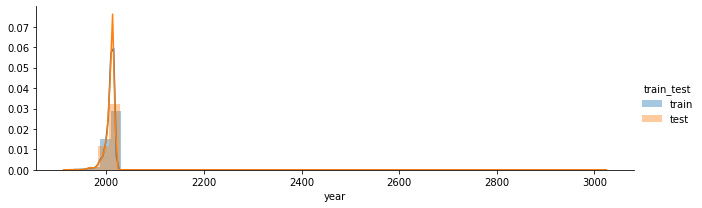

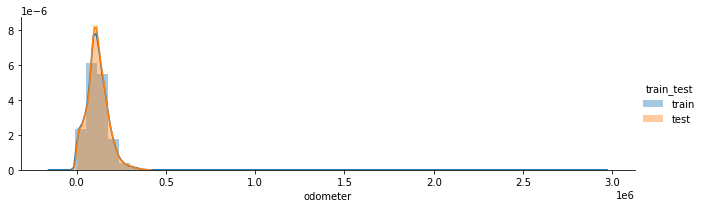

In [10]:
# 数値データのヒストグラム
fig = plt.figure(figsize=(30,6*num_df.shape[1]))

for col in num_cols:
    g=sns.FacetGrid(num_df, hue='train_test', height=3, aspect=3)
    g.map(sns.distplot, col)
    g.add_legend()

In [11]:
def only_cat_train_test(f_col):
    train_cat_unique = train_df[f_col].unique()
    test_cat_unique  = test_df[f_col].unique()
    print('train, testのみに含まれるデータ')
    print(f'only_train_region = {[r for r in train_cat_unique if r not in test_cat_unique]}')
    print(f'only_test_region  = {[r for r in test_cat_unique if r not in train_cat_unique]}')


def show_countplot(df, f_col, threshhold, fs):
    plt.figure(figsize=fs)
    df['count'] = cat_df.groupby(f_col)['train_test'].transform('count')
    if df[f_col].nunique() > 30:
        df = df[df['count']>threshhold]
    df = df.sort_values('count')
    ax = sns.countplot(x=f_col, data=df)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


def compare_cat_value_counts(df, f_col):
    df = df.groupby([f_col, 'train_test']).count().reset_index()
    compare_df = \
        pd.merge(
            left  = df[df['train_test']=='train'],
            right = df[df['train_test']=='test'],
            how = 'left', on = f_col
        )

    print('\n片方だけに多く含まれるデータ')
    display(compare_df[abs(compare_df['count_x'] - compare_df['count_y']) > 100])
    print('\n')


def visualize_category_data(focus_col, threshhold, fs):
    df = cat_df[[focus_col, 'train_test']].copy()
    # train or testにのみ含まれるデータ
    only_cat_train_test(focus_col)
    # カウントプロットの表示
    show_countplot(df, focus_col, threshhold, fs)
    # train, testにのみ多く含まれるデータ
    compare_cat_value_counts(df, focus_col)

train, testのみに含まれるデータ
only_train_region = []
only_test_region  = []

片方だけに多く含まれるデータ


,region,train_test_x,count_x,train_test_y,count_y


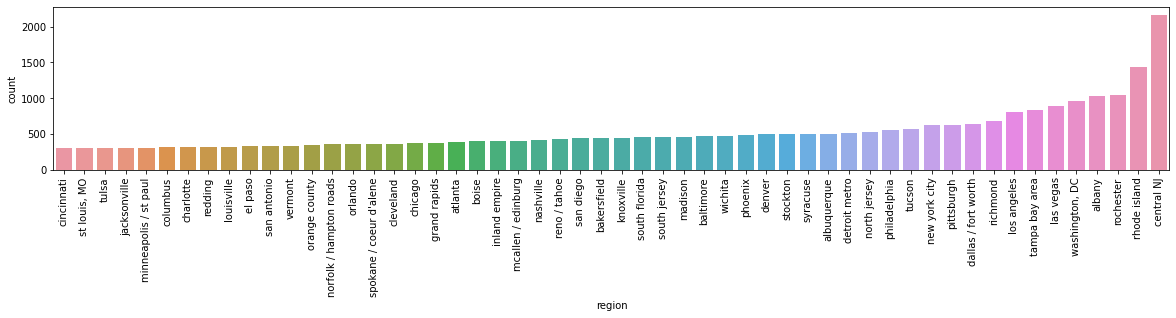

In [12]:
visualize_category_data('region', 300, (20,3))

train, testのみに含まれるデータ
only_train_region = []
only_test_region  = ['CHEVROLET', 'BMW', 'HONDA', 'ｂｕｉｃｋ', 'FORD', 'CADILLAC', 'VOLKSWAGEN', 'LEXUS', 'JEEP', 'TOYOTA', 'GMC', 'ｆｏｒｄ', 'JAGUAR', 'ｃｈｅｖｒｏｌｅｔ', 'RAM', 'ACURA', 'ＴＯＹＯＴＡ', 'HYUNDAI', 'MERCEDES-BENZ', 'KIA', 'PONTIAC', 'NISSAN', 'ｌｅｘｕｓ', 'MITSUBISHI', 'DODGE', 'INFINITI', 'BUICK', 'ｊｅｅｐ', 'ｔｏｙｏｔａ', 'ｈｏｎｄａ', 'AUDI', 'ｃａｄｉｌｌａｃ', 'ｋｉａ', 'CHRYSLER', 'ｍｅｒｃｕｒｙ', 'ｎｉｓｓａｎ', 'ｍａｚｄａ', 'LINCOLN', 'MERCURY', 'lexuѕ', 'ｒａｍ', 'ＦＯＲＤ', 'FIAT', 'SUBARU', 'ｂｍｗ', 'ＢＭＷ', 'MAZDA', 'ＣＨＥＶＲＯＬＥＴ', 'ｖｏｌｋｓｗａｇｅｎ', 'ｈｙｕｎｄａｉ', 'MINI', 'niѕsan', 'ＭＡＺＤＡ', 'ｓａｔｕｒｎ', 'SATURN', 'ｍｉｔｓｕｂｉｓｈｉ', 'ＲＡＭ', 'ａｕｄｉ', 'ＣＡＤＩＬＬＡＣ', 'ＮＩＳＳＡＮ', 'ｉｎｆｉｎｉｔｉ', 'ｍｅｒｃｅｄｅｓ－ｂｅｎｚ', 'VOLVO', 'ＭＩＮＩ', 'ｓｕｂａｒｕ', 'toyotа', 'ｖｏｌｖｏ', 'ａｃｕｒａ', 'ＶＯＬＫＳＷＡＧＥＮ', 'ｃｈｒｙｓｌｅｒ', 'ＳＵＢＡＲＵ', 'nisѕan', 'ＭＩＴＳＵＢＩＳＨＩ', 'ＨＹＵＮＤＡＩ', 'vоlkswagen', 'ｐｏｎｔｉａｃ', 'ROVER', 'ｇｍｃ', 'ＡＣＵＲＡ', 'ＢＵＩＣＫ', 'SUBΑRU', 'ＪＥＥＰ', 'ᴄhrysler', 'ＭＥＲＣＵＲＹ', 'ｄｏｄｇｅ', 'ＤＯＤＧＥ', 'SΑTURN', 'аcura']

片方だけに多く含まれるデータ


,manufacturer,train_test_x,count_x,train_test_y,count_y
39,bmw,train,2736,test,2865


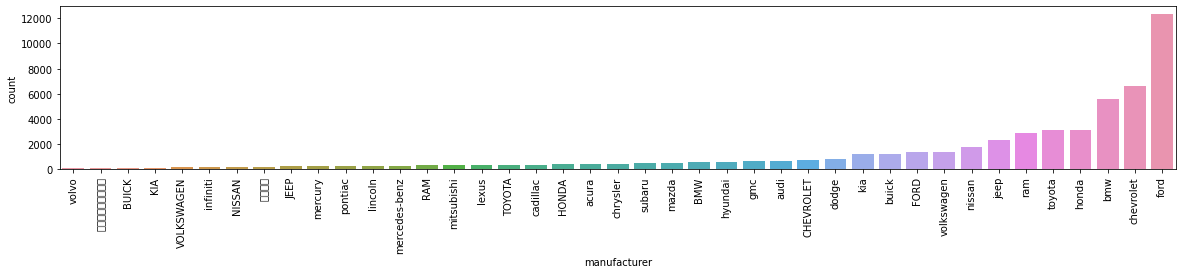

In [13]:
visualize_category_data('manufacturer', 100, (20,3))

train, testのみに含まれるデータ
only_train_region = []
only_test_region  = []

片方だけに多く含まれるデータ


,condition,train_test_x,count_x,train_test_y,count_y


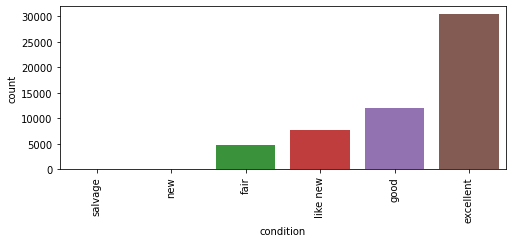

In [14]:
visualize_category_data('condition', 100, (8, 3))

train, testのみに含まれるデータ
only_train_region = []
only_test_region  = []

片方だけに多く含まれるデータ


,cylinders,train_test_x,count_x,train_test_y,count_y
5,6 cylinders,train,11504,test,11697
6,8 cylinders,train,5727,test,5613


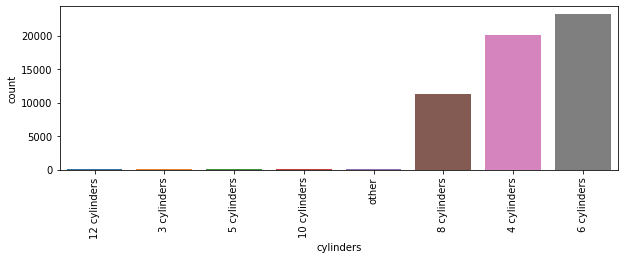

In [15]:
visualize_category_data('cylinders', 100, (10,3))

train, testのみに含まれるデータ
only_train_region = [nan]
only_test_region  = [nan]

片方だけに多く含まれるデータ


,fuel,train_test_x,count_x,train_test_y,count_y
0,diesel,train,2639,test,2515
2,gas,train,23546,test,23427


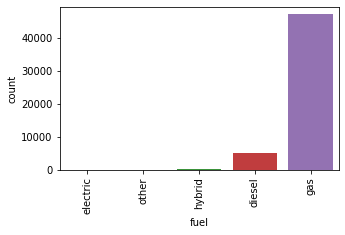

In [16]:
visualize_category_data('fuel', 100, (5,3))

train, testのみに含まれるデータ
only_train_region = [nan]
only_test_region  = [nan]

片方だけに多く含まれるデータ


,title_status,train_test_x,count_x,train_test_y,count_y
0,clean,train,22365,test,22716


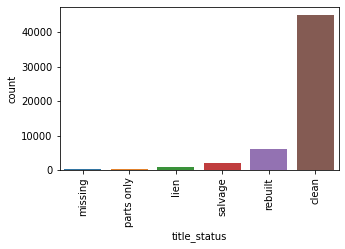

In [17]:
visualize_category_data('title_status', 100, (5, 3))

train, testのみに含まれるデータ
only_train_region = []
only_test_region  = []

片方だけに多く含まれるデータ


,transmission,train_test_x,count_x,train_test_y,count_y


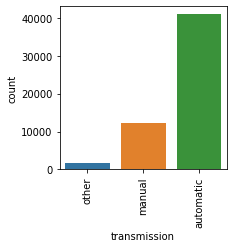

In [18]:
visualize_category_data('transmission', 100, (3,3))

train, testのみに含まれるデータ
only_train_region = []
only_test_region  = []

片方だけに多く含まれるデータ


,drive,train_test_x,count_x,train_test_y,count_y


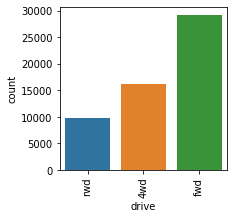

In [19]:
visualize_category_data('drive', 100, (3,3))

train, testのみに含まれるデータ
only_train_region = []
only_test_region  = []

片方だけに多く含まれるデータ


,drive,train_test_x,count_x,train_test_y,count_y


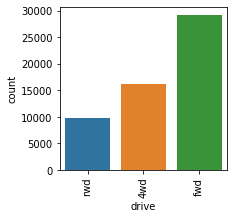

In [20]:
visualize_category_data('drive', 100, (3,3))

train, testのみに含まれるデータ
only_train_region = []
only_test_region  = ['midーsize', 'fullーsize', 'mid−size', 'full−size', 'subーcompact']

片方だけに多く含まれるデータ


,size,train_test_x,count_x,train_test_y,count_y


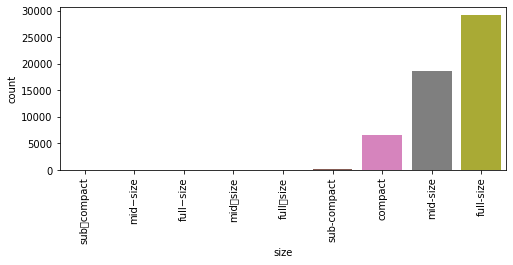

In [21]:
visualize_category_data('size', 100, (8,3))

train, testのみに含まれるデータ
only_train_region = [nan]
only_test_region  = [nan]

片方だけに多く含まれるデータ


,type,train_test_x,count_x,train_test_y,count_y
9,sedan,train,9259,test,9476


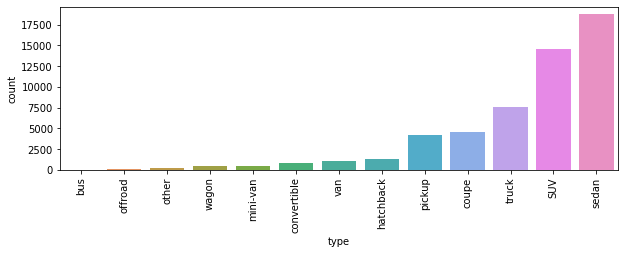

In [22]:
visualize_category_data('type', 100, (10,3))

train, testのみに含まれるデータ
only_train_region = []
only_test_region  = []

片方だけに多く含まれるデータ


,paint_color,train_test_x,count_x,train_test_y,count_y


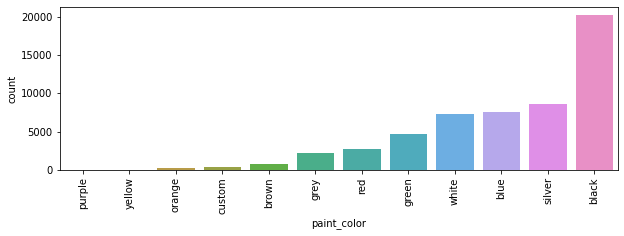

In [23]:
visualize_category_data('paint_color', 100, (10,3))

train, testのみに含まれるデータ
only_train_region = [nan]
only_test_region  = [nan]

片方だけに多く含まれるデータ


,state,train_test_x,count_x,train_test_y,count_y
34,ny,train,1841,test,1960


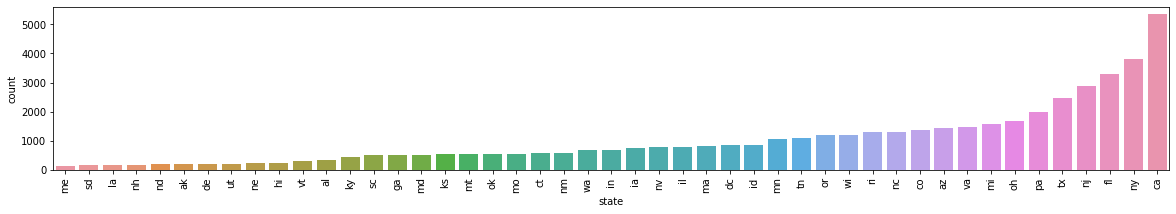

In [24]:
visualize_category_data('state', 100, (20,3))